# Spin-Orbit Coupling
## Action by Leonard A. Gómez-García

In this chapter, we start by further examining the effects of a tidal torque on a satellite’s rotation.

For details on the theory please refer directly to the book:

> Murray, C. D., & Dermott, S. F. (1999). Solar system dynamics. Cambridge university press.

In [6]:
#Packages
import numpy as np
import matplotlib.pyplot as plt

#Routines and constants from packages
from scipy.integrate import odeint
from scipy.constants import G
from ipywidgets import interact, fixed
from functools import partial

## 5.3 The Permanent Quadrupole Moment

During this section we define the principal moments of inertia:
$$
\mathcal{A} = \Sigma \delta m (y^{2} + z^{2})\\
\mathcal{B} = \Sigma \delta m (z^{2} + x^{2})\\
\mathcal{C} = \Sigma \delta m (x^{2} + y^{2})$$

The table 5.2 shows some physical and orbital quantities for Mercury and the Moon:

| Quantity | Mercury | Moon |
| :--- | :--- | :--- |
| $k_2$ | $0.1$ | $0.03$ |
| $Q$ | 100 | 27 |
| $e$ | $0.206$ | $0.0549$ |
| $\frac{(\mathcal{B}-\mathcal{A})}{\mathcal{C}}$ | $10^{-4}$ | $2.28 \times 10^{-4}$ |
| $H(p, e)$ | $0.65$ | $0.99$ |
| $T_{\text {libration }}$ | $17 \mathrm{y}$ | $2.88 \mathrm{y}$ |
| $\gamma_0$ | 2" | $9.6$" |
| $\frac{2 \pi}{\dot{\theta}_{\text {initial }}}$ | $9 \mathrm{~h}$ | $9 \mathrm{~h}$ |
| $T_{\text{despin}}$ | $5 \times 10^9y$ | $3 \times 10^7y$ |
| $\frac{\left\langle N_{\mathrm{s}}\right\rangle \pi}{U}$ | $10^{-4}$ | $6 \times 10^{-4}$ |

And applying this definition we now derive an expression for the external gravitational field of a permanently deformed satellite in terms of its principal moments of inertia, A , B , and C defined with respect to the centre of mass, in absence of tidal torques, we arrive at the equation of motion for $\theta$ 5.54:

$$
C\ddot{\theta} - \frac{3}{2}\left(2mR_{s}^{2}\right) \frac{Gm_{p}}{r^{3}}\sin{2\psi} = 0 \tag{5.54}\\
\mathcal{C}\ddot{\theta} - \frac{3}{2}\left(\mathcal{B} - \mathcal{A}\right) \frac{Gm_{p}}{r^{3}}\sin{2\psi} = 0\\
\ddot{\theta} - \frac{3}{2}\frac{\left(\mathcal{B} - \mathcal{A}\right)}{\mathcal{C}} \frac{Gm_{p}}{r^{3}}\sin{2\psi} = 0
$$

Let's solve this equation numerically:

**To do:** Solve and plot the equation. (Remember import the values and don't write them by hand)

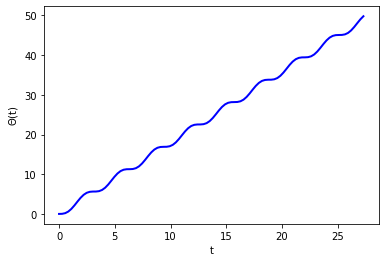

In [102]:
# Define the differential equation
def f(y, t, k_func):
    k = k_func(t)
    return [y[1], -k]

# Define the initial conditions
y0 = [0, 0]

# Define the time range and time step
t = np.linspace(0, 27.3, 100)

# Define a function that solves the differential equation for a given function of k
def solve_ode(k_func):
    sol = odeint(f, y0, t, args=(k_func,))
    return sol[:, 0]

# Define a function that plots the solution for a given function of k
def plot_solution(k_func):
    sol = solve_ode(k_func)
    fig, ax = plt.subplots()
    ax.plot(t, sol, 'b', lw=2)
    #ax.set_xlim(0, 10)
    #ax.set_ylim(-1.5, 1.5)
    ax.set_xlabel('t')
    ax.set_ylabel('$\Theta$(t)')
    plt.show()

# Create a function that defines k as a function of time
def k(t):
    return -3/2*2.28e-4*(G*5.972e24/380e8)*np.sin(2*t)

plot_solution(k)

Due the fact that $\psi$ depends of $\theta$ and $f$, those which vary with time, we decided to plot the equation with as a fixed parameter to understand how it works.

**Ideas**
* Calculate $\mathcal{A}, \mathcal{B}, \mathcal{C}$ for an arbitrary planet.
* Show: Thus, in the absence of a permanent quadrupole moment, the Moon, for example, would rotate about 3% faster than the observed synchronous rate, and over a period of about 2.6 y, we would see both sides of the satellite